In [24]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [25]:
!wget -O SCD-PatientStat.csv https://raw.githubusercontent.com/cargonriv/cardiac-imaging-AI/main/SCD-PatientStat.csv
df = pd.read_csv('SCD-PatientStat.csv')
df.head()

--2021-05-21 02:10:38--  https://raw.githubusercontent.com/cargonriv/cardiac-imaging-AI/main/SCD-PatientStat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 1981 (1.9K) [text/plain]
Saving to: ‘SCD-PatientStat.csv’

SCD-PatientStat.csv 100%[===================>]   1.93K  --.-KB/s    in 0s      

2021-05-21 02:10:38 (19.3 MB/s) - ‘SCD-PatientStat.csv’ saved [1981/1981]



,Patient,Gender,Age,HeartRate,EDV,ESV,SV,EF,CO,HF
0,1,Male,53,79,180.69,108.71,71.99,39.84,5.69,1
1,2,Male,48,87,239.56,180.46,59.09,24.66,5.14,1
2,3,Male,79,65,271.43,167.00,104.43,38.47,6.79,1
3,4,Male,45,54,199.57,136.55,63.02,31.58,3.40,1
4,5,Male,60,88,219.27,110.83,108.44,49.45,9.54,0


In [26]:
df.shape

(41, 10)

In [27]:
df.dtypes

Patient        int64
Gender        object
Age            int64
HeartRate      int64
EDV          float64
ESV          float64
SV           float64
EF           float64
CO           float64
HF             int64
dtype: object

In [28]:
df['HF'].value_counts()

0    21
1    20
Name: HF, dtype: int64

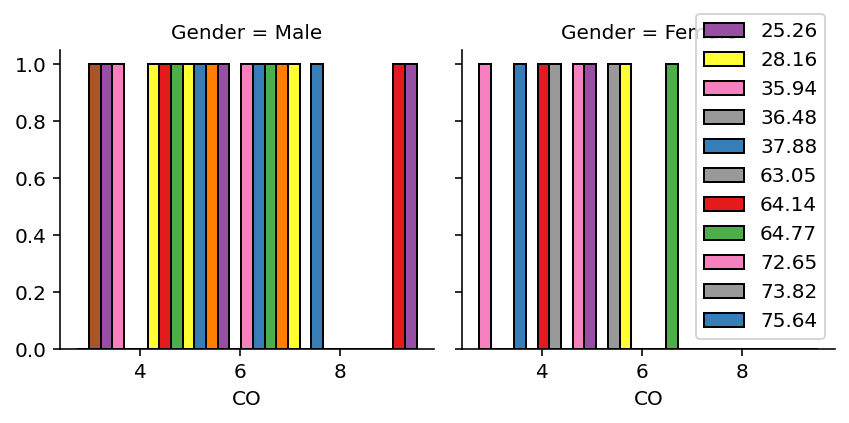

In [29]:
import seaborn as sns

bins = np.linspace(df.CO.min(), df.CO.max(), 30)
g = sns.FacetGrid(df, col="Gender", hue="EF", palette="Set1", col_wrap=2)
g.map(plt.hist, 'CO', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

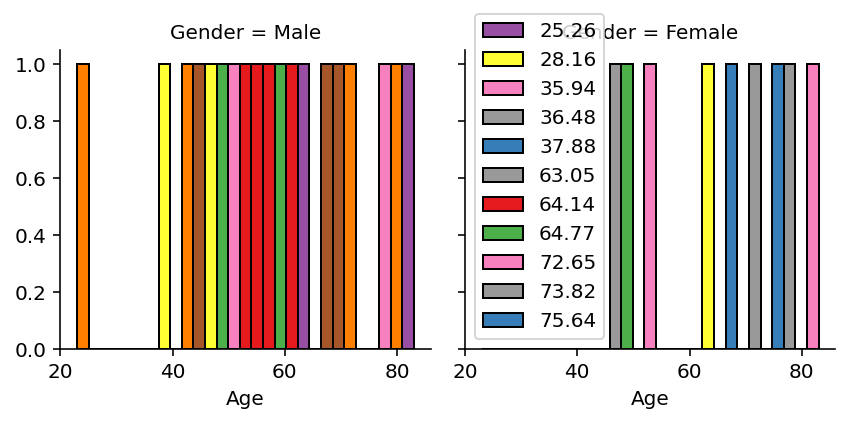

In [30]:
bins = np.linspace(df.Age.min(), df.Age.max(), 30)
g = sns.FacetGrid(df, col="Gender", hue="EF", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [31]:
df.groupby(['Gender'])['HF'].value_counts(normalize=True)

Gender  HF
Female  0     0.545455
        1     0.454545
Male    0     0.500000
        1     0.500000
Name: HF, dtype: float64

In [32]:
df.groupby(['Age'])['HF'].value_counts(normalize=True)

Age  HF
23   0     1.000000
38   0     1.000000
42   0     1.000000
45   1     1.000000
46   0     1.000000
47   0     1.000000
48   0     0.500000
     1     0.500000
51   0     1.000000
52   1     1.000000
53   0     0.666667
     1     0.333333
55   1     1.000000
57   1     1.000000
60   0     1.000000
61   0     1.000000
62   0     1.000000
63   0     0.500000
     1     0.500000
68   1     1.000000
69   1     1.000000
70   0     1.000000
71   1     1.000000
76   0     1.000000
77   1     0.750000
     0     0.250000
79   1     1.000000
81   1     1.000000
82   1     1.000000
83   0     1.000000
Name: HF, dtype: float64

In [33]:
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
Feature = df[['Gender','Age','HeartRate','SV','EF', 'CO', 'HF']]
Feature = pd.concat([Feature,pd.get_dummies(df['HF'])], axis=1)
Feature.head()


,Gender,Age,HeartRate,SV,EF,CO,HF,0,1
0,0,53,79,71.99,39.84,5.69,1,0,1
1,0,48,87,59.09,24.66,5.14,1,0,1
2,0,79,65,104.43,38.47,6.79,1,0,1
3,0,45,54,63.02,31.58,3.40,1,0,1
4,0,60,88,108.44,49.45,9.54,0,1,0


In [34]:
X = Feature
X[0:5]

,Gender,Age,HeartRate,SV,EF,CO,HF,0,1
0,0,53,79,71.99,39.84,5.69,1,0,1
1,0,48,87,59.09,24.66,5.14,1,0,1
2,0,79,65,104.43,38.47,6.79,1,0,1
3,0,45,54,63.02,31.58,3.40,1,0,1
4,0,60,88,108.44,49.45,9.54,0,1,0


In [35]:
y = df['HF'].values
y[0:5]

array([1, 1, 1, 1, 0])

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=41)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

Train set: (32, 9) (32,)
Test set: (9, 9) (9,)


array([[-0.60553007, -0.55782323,  0.99733295, -0.25461099, -0.5972232 ,
         0.29991078,  1.02469508, -1.02469508,  1.02469508],
       [-0.60553007, -0.91517873,  1.71946365, -0.86510946, -1.43447915,
        -0.04780069,  1.02469508, -1.02469508,  1.02469508],
       [-0.60553007,  1.3004254 , -0.26639578,  1.28062702, -0.67278583,
         0.99533372,  1.02469508, -1.02469508,  1.02469508],
       [-0.60553007, -1.12959204, -1.25932549, -0.67912039, -1.05280516,
        -1.14783334,  1.02469508, -1.02469508,  1.02469508],
       [-0.60553007, -0.05752552,  1.80972999,  1.47040213, -0.06718172,
         2.73389106, -0.97590007,  0.97590007, -0.97590007]])

In [37]:
HFTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
HFTree # it shows the default parameters
HFTree.fit(X_train,y_train)
predTree = HFTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

[0 0 1 1 0]
[0 0 1 1 0]
DecisionTrees's Accuracy:  1.0


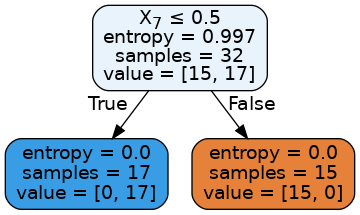

In [38]:
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(HFTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('foto.png')
Image(graph.create_png())